# Lab | Customer Analysis Final Round


For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

## 01 - Problem (case study)

- Data Description.

- Goal.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None


In [25]:
data = pd.read_csv(r'C:\Users\Karo\Desktop\Ironhack\Labs\lab-customer-analysis-final-round\files_for_lab\csv_files\marketing_customer_analysis.csv')
data
#goal:clean the data and get a regression with the goal value total claim amount

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## 02 - Getting Data

Read the .csv file.

In [26]:
#see above

## 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

In [27]:
data.columns = data.columns.str.lower()
data.columns = [column.lower().replace(' ', '_') for column in data.columns]
data = data.set_index('customer')
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [28]:
data = data.drop_duplicates()
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [29]:
data.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [30]:
num= data.select_dtypes(np.number)
num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
YM19146,4100.398533,47761,104,16,58,0,1,541.282007
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
TD14365,8163.890428,0,85,9,37,3,2,790.784983


In [31]:
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])
cat = data.select_dtypes('object')
cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [32]:
for column in cat.columns:
    print(column, cat[column].unique())

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size ['Medsize' 'Small' 'Large']


## 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

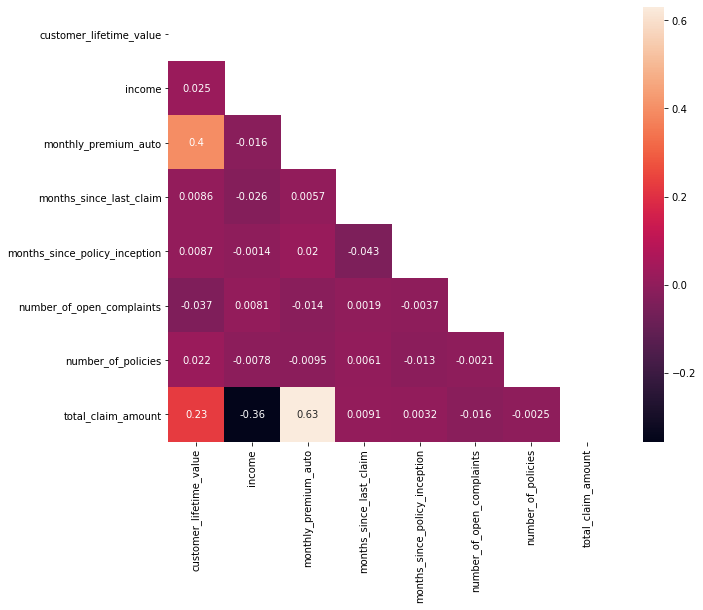

In [33]:
mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

In [34]:
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [35]:
data, _ci = boxcox_transform(data)
data

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2.716118,No,Basic,Bachelor,2011-02-24,Employed,F,1275.012045,Suburban,Married,0.683655,10.893457,3.015081,0.644285,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,32.956920,Two-Door Car,Medsize
QZ44356,Arizona,2.768036,No,Extended,Bachelor,2011-01-31,Unemployed,F,1194.975258,Suburban,Single,0.684170,5.814733,18.732619,0.644285,1.427879,Personal Auto,Personal L3,Offer3,Agent,56.192515,Four-Door Car,Medsize
AI49188,Nevada,2.794342,No,Premium,Bachelor,2011-02-19,Employed,F,1168.501425,Suburban,Married,0.684335,7.357267,17.346401,0.644285,0.607879,Personal Auto,Personal L3,Offer1,Agent,39.968464,Two-Door Car,Medsize
WW63253,California,2.772307,No,Basic,Bachelor,2011-01-20,Unemployed,M,1194.975258,Suburban,Married,0.684315,7.357267,26.084587,0.644285,1.366645,Corporate Auto,Corporate L2,Offer1,Call Center,38.664596,SUV,Medsize
HB64268,Washington,2.717291,No,Basic,Bachelor,2011-02-03,Employed,M,1095.015698,Rural,Single,0.683767,5.477180,19.411393,0.644285,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.523131,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,California,2.740264,No,Premium,College,2011-01-06,Employed,F,1153.754576,Suburban,Single,0.684294,6.765668,23.940636,0.644285,0.000000,Personal Auto,Personal L2,Offer1,Branch,39.075812,Four-Door Car,Large
LA72316,California,2.815127,No,Basic,Bachelor,2011-02-10,Employed,M,1480.791322,Urban,Married,0.683767,7.357267,32.984608,0.644285,0.607879,Personal Auto,Personal L1,Offer2,Web,23.540219,Four-Door Car,Medsize
TD14365,California,2.775296,No,Extended,Bachelor,2011-02-06,Unemployed,M,1194.975258,Suburban,Single,0.684027,4.383545,16.993411,1.172370,0.607879,Corporate Auto,Corporate L2,Offer1,Branch,47.133907,Four-Door Car,Medsize


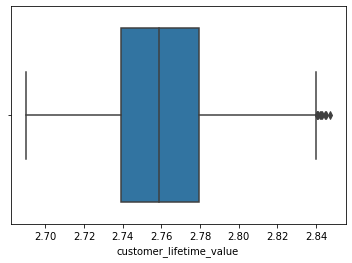

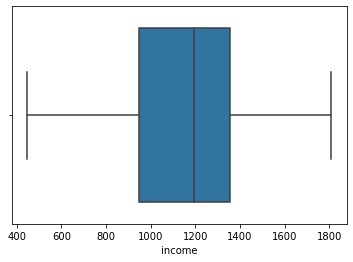

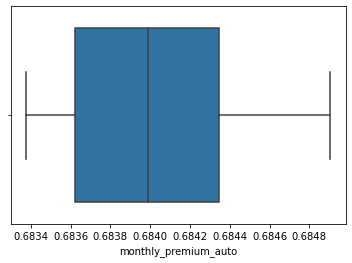

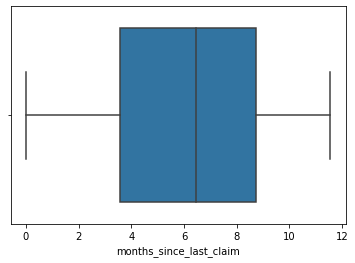

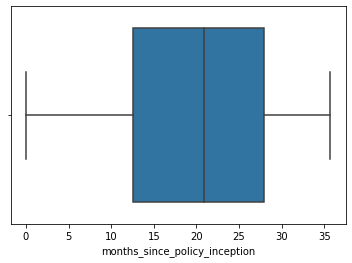

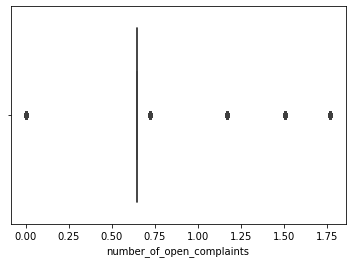

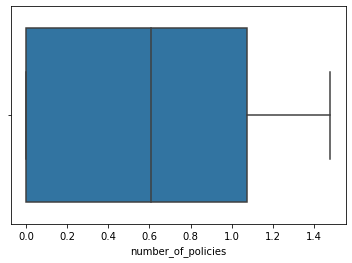

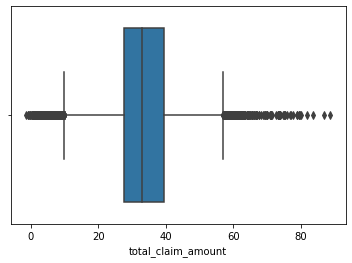

In [36]:
for column in data.select_dtypes(np.number).columns:
    sns.boxplot(data[column])
    plt.show()

In [37]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [38]:
data1 = data.copy()

data1 = remove_outliers(data1, threshold=1.5, skip_columns=['total_claim_amount','number_of_open_complaints']) 
data1

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2.716118,No,Basic,Bachelor,2011-02-24,Employed,F,1275.012045,Suburban,Married,0.683655,10.893457,3.015081,0.644285,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,32.956920,Two-Door Car,Medsize
QZ44356,Arizona,2.768036,No,Extended,Bachelor,2011-01-31,Unemployed,F,1194.975258,Suburban,Single,0.684170,5.814733,18.732619,0.644285,1.427879,Personal Auto,Personal L3,Offer3,Agent,56.192515,Four-Door Car,Medsize
AI49188,Nevada,2.794342,No,Premium,Bachelor,2011-02-19,Employed,F,1168.501425,Suburban,Married,0.684335,7.357267,17.346401,0.644285,0.607879,Personal Auto,Personal L3,Offer1,Agent,39.968464,Two-Door Car,Medsize
WW63253,California,2.772307,No,Basic,Bachelor,2011-01-20,Unemployed,M,1194.975258,Suburban,Married,0.684315,7.357267,26.084587,0.644285,1.366645,Corporate Auto,Corporate L2,Offer1,Call Center,38.664596,SUV,Medsize
HB64268,Washington,2.717291,No,Basic,Bachelor,2011-02-03,Employed,M,1095.015698,Rural,Single,0.683767,5.477180,19.411393,0.644285,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.523131,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,California,2.740264,No,Premium,College,2011-01-06,Employed,F,1153.754576,Suburban,Single,0.684294,6.765668,23.940636,0.644285,0.000000,Personal Auto,Personal L2,Offer1,Branch,39.075812,Four-Door Car,Large
LA72316,California,2.815127,No,Basic,Bachelor,2011-02-10,Employed,M,1480.791322,Urban,Married,0.683767,7.357267,32.984608,0.644285,0.607879,Personal Auto,Personal L1,Offer2,Web,23.540219,Four-Door Car,Medsize
TD14365,California,2.775296,No,Extended,Bachelor,2011-02-06,Unemployed,M,1194.975258,Suburban,Single,0.684027,4.383545,16.993411,1.172370,0.607879,Corporate Auto,Corporate L2,Offer1,Branch,47.133907,Four-Door Car,Medsize


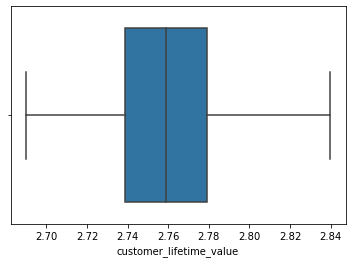

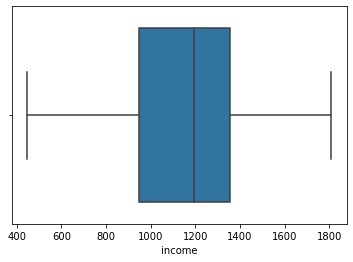

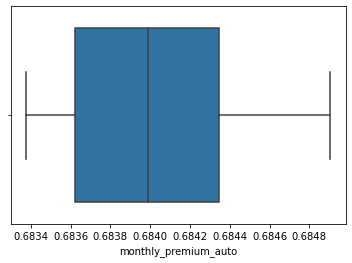

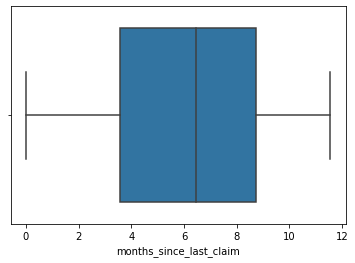

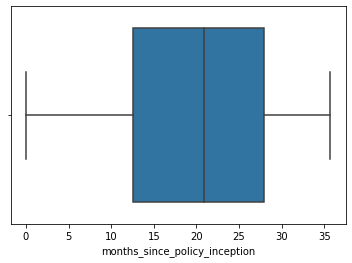

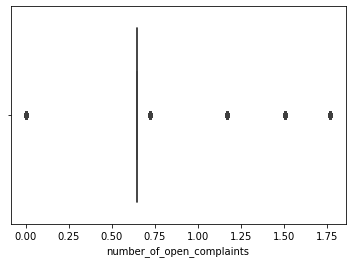

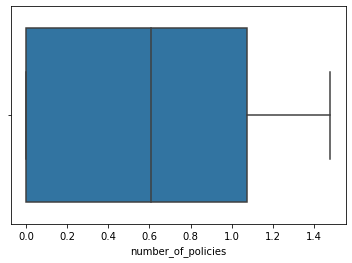

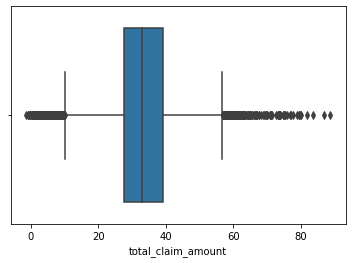

In [40]:
for column in data1.select_dtypes(np.number).columns:
    sns.boxplot(data1[column])
    plt.show()

In [39]:
data1

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2.716118,No,Basic,Bachelor,2011-02-24,Employed,F,1275.012045,Suburban,Married,0.683655,10.893457,3.015081,0.644285,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,32.956920,Two-Door Car,Medsize
QZ44356,Arizona,2.768036,No,Extended,Bachelor,2011-01-31,Unemployed,F,1194.975258,Suburban,Single,0.684170,5.814733,18.732619,0.644285,1.427879,Personal Auto,Personal L3,Offer3,Agent,56.192515,Four-Door Car,Medsize
AI49188,Nevada,2.794342,No,Premium,Bachelor,2011-02-19,Employed,F,1168.501425,Suburban,Married,0.684335,7.357267,17.346401,0.644285,0.607879,Personal Auto,Personal L3,Offer1,Agent,39.968464,Two-Door Car,Medsize
WW63253,California,2.772307,No,Basic,Bachelor,2011-01-20,Unemployed,M,1194.975258,Suburban,Married,0.684315,7.357267,26.084587,0.644285,1.366645,Corporate Auto,Corporate L2,Offer1,Call Center,38.664596,SUV,Medsize
HB64268,Washington,2.717291,No,Basic,Bachelor,2011-02-03,Employed,M,1095.015698,Rural,Single,0.683767,5.477180,19.411393,0.644285,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.523131,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,California,2.740264,No,Premium,College,2011-01-06,Employed,F,1153.754576,Suburban,Single,0.684294,6.765668,23.940636,0.644285,0.000000,Personal Auto,Personal L2,Offer1,Branch,39.075812,Four-Door Car,Large
LA72316,California,2.815127,No,Basic,Bachelor,2011-02-10,Employed,M,1480.791322,Urban,Married,0.683767,7.357267,32.984608,0.644285,0.607879,Personal Auto,Personal L1,Offer2,Web,23.540219,Four-Door Car,Medsize
TD14365,California,2.775296,No,Extended,Bachelor,2011-02-06,Unemployed,M,1194.975258,Suburban,Single,0.684027,4.383545,16.993411,1.172370,0.607879,Corporate Auto,Corporate L2,Offer1,Branch,47.133907,Four-Door Car,Medsize


In [41]:
X = data1.drop('total_claim_amount', axis=1)
X_num = X.select_dtypes(include = np.number)
y = data1['total_claim_amount']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_num))

StandardScaler()


In [47]:
X_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer,,,,,,,
BU79786,2.716118,1275.012045,0.683655,10.893457,3.015081,0.644285,0.000000
QZ44356,2.768036,1194.975258,0.684170,5.814733,18.732619,0.644285,1.427879
AI49188,2.794342,1168.501425,0.684335,7.357267,17.346401,0.644285,0.607879
WW63253,2.772307,1194.975258,0.684315,7.357267,26.084587,0.644285,1.366645
HB64268,2.717291,1095.015698,0.683767,5.477180,19.411393,0.644285,0.000000
...,...,...,...,...,...,...,...
YM19146,2.740264,1153.754576,0.684294,6.765668,23.940636,0.644285,0.000000
LA72316,2.815127,1480.791322,0.683767,7.357267,32.984608,0.644285,0.607879
TD14365,2.775296,1194.975258,0.684027,4.383545,16.993411,1.172370,0.607879


In [50]:
cat1 = data1.select_dtypes('object')
cat1

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [51]:
cat_new = pd.get_dummies(cat1, drop_first=True)
cat_new

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
QZ44356,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
AI49188,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
WW63253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
HB64268,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
LA72316,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
TD14365,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [52]:
newdata = pd.concat([X_num, cat_new], axis=1)
newdata

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,2.716118,1275.012045,0.683655,10.893457,3.015081,0.644285,0.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
QZ44356,2.768036,1194.975258,0.684170,5.814733,18.732619,0.644285,1.427879,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
AI49188,2.794342,1168.501425,0.684335,7.357267,17.346401,0.644285,0.607879,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
WW63253,2.772307,1194.975258,0.684315,7.357267,26.084587,0.644285,1.366645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
HB64268,2.717291,1095.015698,0.683767,5.477180,19.411393,0.644285,0.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,2.740264,1153.754576,0.684294,6.765668,23.940636,0.644285,0.000000,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
LA72316,2.815127,1480.791322,0.683767,7.357267,32.984608,0.644285,0.607879,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
TD14365,2.775296,1194.975258,0.684027,4.383545,16.993411,1.172370,0.607879,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [53]:
X = newdata

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## 05 - Modeling

Apply model.

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

In [55]:
predictions = model.predict(X_test)

In [56]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8289263563979131, 3.7238926278096196, 4.9434246511439985)

In [57]:
MSE=mean_squared_error(y_test, predictions, squared=False)
import math
math.sqrt(MSE)

2.2233813553108694

## 07 - Reporting

Present results.

In [61]:
# not sure how to present my results. any suggestions?